# Classificação de Flores Iris

## 📌  Objetivo do projeto

Este projeto tem como objetivo classificar espécies de flores Iris a partir de suas características morfológicas.

Modelos desse tipo podem ser valiosos para botânicos e agricultores que buscam identificar espécies de forma automática, seja por meio de imagens ou sensores.

Mais do que isso, ele abre portas para aplicações como sistemas de recomendação para cultivo e manejo.

No fundo, porém, é uma iniciativa de aprendizado e descoberta em data science e machine learning, servindo como ponto de partida para projetos futuros ainda mais desafiadores.

## 1. 📚 Preparando bibliotecas e analisando dados

### Importação de bibliotecas relevantes

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

#### Leitura de dados

In [11]:
# Vamos utilizar o dataset da própria biblioteca do seaborn para carregar os dados

dados_iris = sns.load_dataset("iris")

dados_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Tudo certo, vamos prosseguir

## 2. 👷🏽 Tratamento dos dados 

Vamos procurar dados duplicados, nulos e outliers

### Dados Duplicados

In [16]:
# Procurando dados duplicados
dados_iris.duplicated().sum()

1

In [17]:
# Verificando o dado duplicado
dados_iris[dados_iris.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [18]:
# O dado é exatamente igual e dado o tamanho do dataset não deve impactar significamente mantê-lo

dados_iris.drop_duplicates(inplace = True)

dados_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Removemos o dado duplicado, vamos seguir com a análise

### Dados nulos

In [21]:
dados_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Nenhum dado está nulo, podemos continuar

### Outliers

Agora vamos verificar se tem outliers e se impactam bastante

Para uma abordagem mais prática e objetiva vamos visualizar um gráfico de caixa

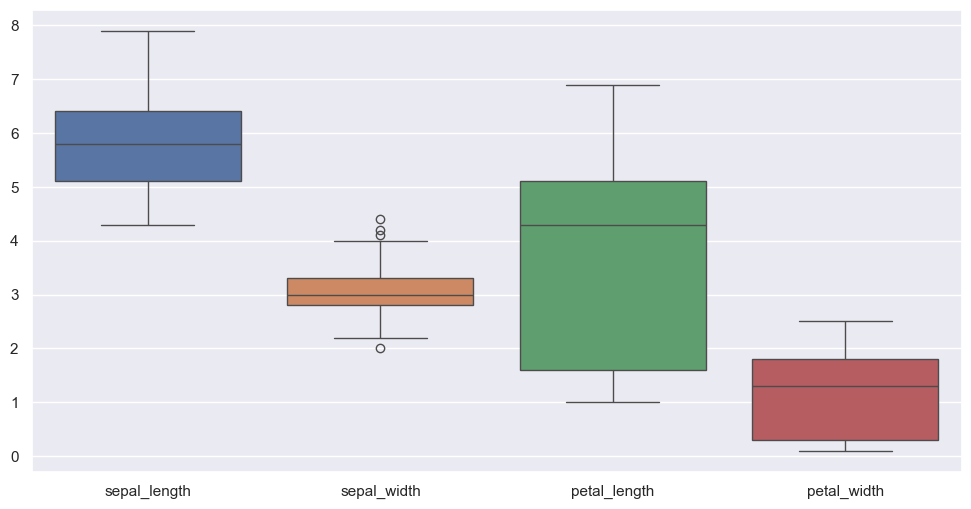

In [26]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = dados_iris) # visualizar todos os gráficos numéricos
plt.show()

Conseguimos ver alguns outliears na coluna sepal_width, mas não sabemos se impacta muito nos resultados

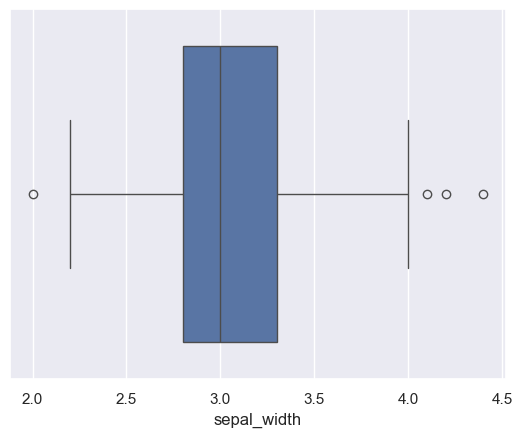

In [28]:
# Visualizando apenas a coluna com outliers

sns.boxplot(x = dados_iris["sepal_width"])
plt.show()

Visualmente aparentam ser 4 outliers, removê-los não deve impactar no dataset, mas primeiro vamos confirmar a influência

In [30]:
# Valores interquartis (representam 50% dos dados)
Q1 = dados_iris["sepal_width"].quantile(0.25)  # Primeiro quartil (25% dos dados)
Q3 = dados_iris["sepal_width"].quantile(0.75)  # Terceiro quartil (75% dos dados)

IQR = Q3 - Q1  # Intervalo interquartil (50% dos dados mais agrupados)

# Limites ("bigodes") calculados como 1.5 vezes o IQR para baixo e para cima
limitante_inferior = Q1 - 1.5 * IQR  # Limite inferior
limitante_superior = Q3 + 1.5 * IQR  # Limite superior

# Identificando outliers: valores fora dos limites inferior ou superior
outliers = dados_iris[(dados_iris["sepal_width"] < limitante_inferior) | (dados_iris["sepal_width"] > limitante_superior)]

# Exibindo os outliers encontrados
outliers

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


Conseguimos visualizar que a maioria dos outliers é da espécie setosa e possuímos um da versicolor

Agora precisamos entender a influência dos outliers nos dados, vamos criar um dataset sem eles

In [33]:
# Estatísticas com outliers
print("Com outliers:")
print(dados_iris["sepal_width"].describe())

# Estatísticas sem outliers
iris_sem_outliers = dados_iris[~dados_iris.index.isin(outliers.index)]
print("\nSem outliers:")
print(iris_sem_outliers["sepal_width"].describe())

Com outliers:
count    149.000000
mean       3.059732
std        0.436342
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

Sem outliers:
count    145.000000
mean       3.042759
std        0.398216
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: sepal_width, dtype: float64


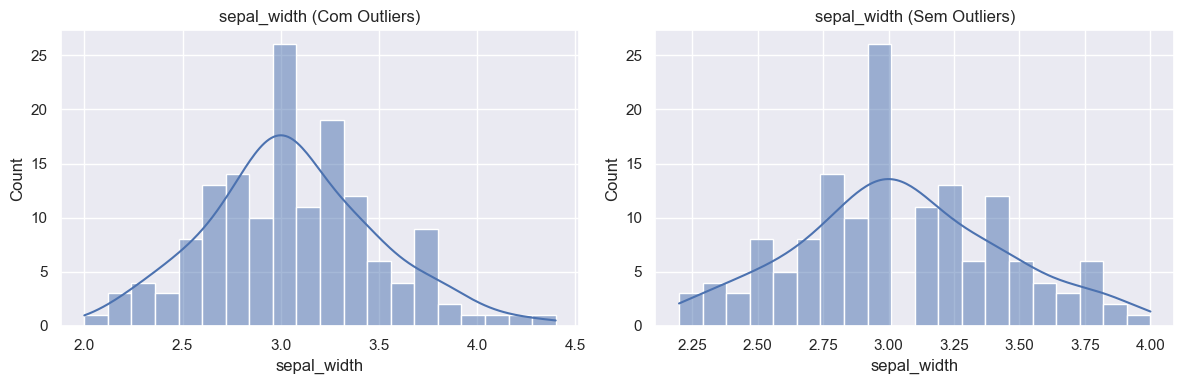

In [34]:
# Histograma com e sem outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(dados_iris["sepal_width"], bins=20, kde=True)
plt.title(f"{"sepal_width"} (Com Outliers)")

plt.subplot(1, 2, 2)
sns.histplot(iris_sem_outliers["sepal_width"], bins=20, kde=True)
plt.title(f"{"sepal_width"} (Sem Outliers)")
plt.tight_layout()
plt.show()

Em alguns pontos os outliers podem ser relativamente impactantes, depende do modelo que iremos utilizar

Para modelos que necessitam de dados mais centralizados pode ser melhor

Vamos manter ambos datasets (com e sem outliers) e vamos aplicar abordagens diferentes para cada modelo

## 3. ☯️ Separação de dados para treino e teste

#### Importar sklearn para separar os dados e preparando dados com outliers

In [40]:
from sklearn.model_selection import train_test_split

# variáveis independentes (features)
X = dados_iris.drop('species', axis = 'columns')

# variável dependente (output)
y = dados_iris['species']

# dados para treinamento e teste de modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Preparando dados sem outliers

In [42]:
# variáveis independentes (features) - sem outliers
X_s = iris_sem_outliers.drop('species', axis = 'columns')

# variável dependente (output) - sem outliers
y_s = iris_sem_outliers['species']

# dados para treinamento e teste de modelo - sem outliers
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.2, random_state = 42)

## 4. 🏋🏼 Treinamento de modelos

Depois de explorar os dados na análise inicial (EDA), identificamos algumas abordagens bem promissoras para trabalhar com esse conjunto de dados:

### 4.1 Support Vector Machine (SVM) - Dataset sem outliers

Para o modelo SVM, optamos por utilizar o dataset sem outliers, pois esse algoritmo é sensível a valores extremos devido à sua dependência na maximização da margem entre as classes. A presença de outliers pode distorcer os hiperplanos de separação, puxando os vetores de suporte para posições menos representativas dos dados principais. Ao remover os outliers, obtemos um conjunto de dados mais agrupado e consistente, o que tende a melhorar o desempenho do modelo, resultando em uma classificação mais precisa e uma margem de separação mais robusta.

#### Importando bibliotecas necessárias

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Criando modelo

In [50]:
# Usando kernel RBF (padrão), ideal para dados não lineares como o Iris sem outliers;
#C=1 equilibra margem e erro, e gamma='scale' adapta a curvatura às características dos dados.

modelo_svm = SVC(C=1, gamma='scale', random_state=42)  

In [51]:
# Treinando o modelo

modelo_svm.fit(X_train_s,y_train_s)

# predições
y_pred_s = modelo_svm.predict(X_test_s)

#### Testando o Modelo

Acurácia do modelo: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29



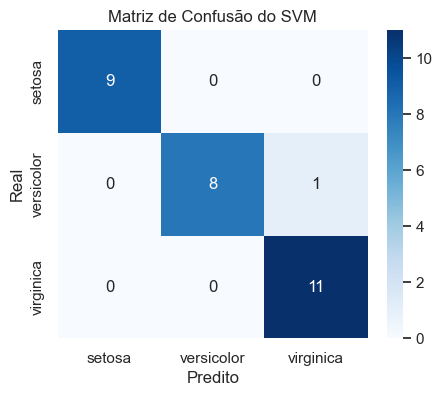

In [53]:
# Avaliando modelo
desempenho_svm = accuracy_score(y_test_s, y_pred_s)
print(f"Acurácia do modelo: {desempenho_svm:.2f}")

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test_s, y_pred_s))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_s, y_pred_s)

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_s), yticklabels=np.unique(y_s))
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão do SVM")
plt.show()

Após os testes, o modelo alcançou uma eficácia de 97% no dataset sem outliers. Nada mal!

Vamos agora explorar outro modelo e ver como ele se sai em comparação.

### 4.2 K-Nearest Neighbor (K-NN) - Dataset sem outliers

Para o modelo K-NN, optamos por utilizar o dataset sem outliers, pois esse algoritmo é sensível a valores extremos devido à sua dependência na proximidade entre os pontos para determinar as classes. A presença de outliers pode influenciar desproporcionalmente as decisões de classificação, já que o modelo considera os vizinhos mais próximos com base em distâncias, como a euclidiana. Esses valores atípicos podem distorcer a vizinhança local, levando a previsões menos representativas dos padrões principais dos dados. Ao remover os outliers, obtemos um conjunto mais coeso e agrupado, o que tende a melhorar o desempenho do K-NN, resultando em uma classificação mais precisa e consistente com a estrutura real das classes

#### Importando bibliotecas necessárias

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#### Preparando os dados

In [61]:
# Escalonamento
scaler = StandardScaler()
X_s_train_scaled = scaler.fit_transform(X_train_s)
X_s_test_scaled = scaler.transform(X_test_s)

#### Criando modelo

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 como valor inicial de vizinhos
knn.fit(X_s_train_scaled, y_train_s)

KNeighborsClassifier()

In [64]:
# Fazendo previsões
y_train_pred = knn.predict(X_s_train_scaled)
y_test_pred = knn.predict(X_s_test_scaled)

#### Testando modelo

In [66]:
desempenho_knn = accuracy_score(y_test_s, y_test_pred)
print(f"Acurácia do modelo: {desempenho_knn:.2f}")

Acurácia do modelo: 0.97


In [67]:
# Relatório de classificação
print("\nRelatório de Classificação (teste):")
print(classification_report(y_test_s, y_test_pred))


Relatório de Classificação (teste):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29



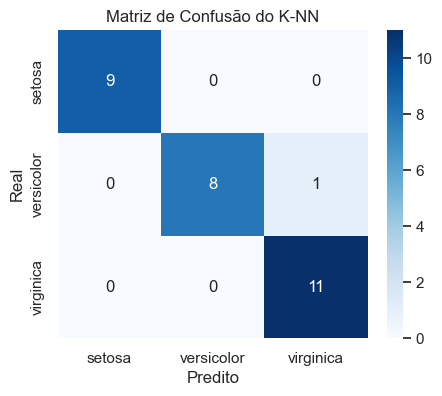

In [68]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_s, y_test_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_s), yticklabels=np.unique(y_s))
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão do K-NN")
plt.show()

O K-NN, sem os outliers, também chegou a 97% de desempenho, empatando com o SVM. Interessante, né? 

Vamos seguir em frente e testar modelos que incluam os outliers pra ver o que muda.

### 4.2 Random Forest - Dataset com outliers

Para o modelo Random Forest, optamos por usar o dataset com outliers, pois esse algoritmo é robusto a valores extremos devido à sua natureza de ensemble. Ele combina múltiplas árvores de decisão, reduzindo o impacto de outliers ao focar nos padrões gerais dos dados, o que mantém a precisão sem necessidade de remoção prévia desses valores.

#### Importando bibliotecas necessárias

In [74]:
from sklearn.ensemble import RandomForestClassifier

#### Criando modelo

In [76]:
# já possuimos os dados separados
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [77]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# previsões
y_test_pred = rf.predict(X_test)

#### Testando modelo

In [80]:
# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_test_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))

Acurácia: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



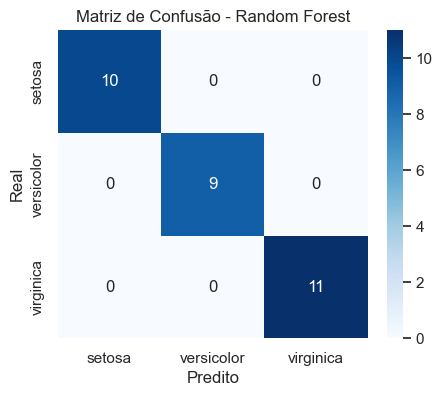

In [81]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

Até agora, essa foi a melhor previsão entre os modelos que testamos. Um destaque que vale a pena explorar mais!

### 4.4 Decision Trees - Dataset com outliers

Para o modelo Decision Tree, escolhemos o dataset com outliers, pois esse algoritmo é naturalmente resistente a valores extremos. Ele divide os dados com base em condições nas features, focando em padrões gerais, e outliers têm impacto limitado, já que não afetam diretamente as regras de decisão.

#### Importando bibliotecas

In [86]:
from sklearn.tree import DecisionTreeClassifier

#### Criando o modelo

In [88]:
# criando e treinando o modelo
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
# previsões
y_pred = dt.predict(X_test)

#### Testando desempenho

In [91]:
# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_test_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))

Acurácia: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



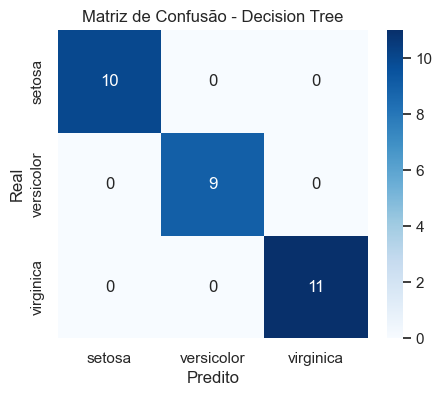

In [92]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Decision Tree")
plt.show()

O modelo de árvores de decisão trouxe resultados sólidos, mas ainda há espaço para ajustar e comparar com os outros.

## 📊 Conclusão

O projeto de previsão de espécies no dataset Iris foi concluído com sucesso, abrangendo a verificação e limpeza dos dados (remoção de duplicatas e outliers em um arquivo separado), a separação adequada dos dados e a aplicação de quatro modelos de machine learning. 

O SVM e o K-NN, utilizando o dataset sem outliers, alcançaram 97% de acurácia, demonstrando bom desempenho em dados mais agrupados, embora o SVM tenha sido impactado pela falta de escalonamento.

Já o Random Forest e a Decision Tree, aplicados ao dataset com outliers, atingiram 100% de acurácia, evidenciando sua robustez a valores extremos e eficácia em capturar padrões gerais.

Esses resultados confirmam que, para o dataset Iris, modelos baseados em árvores são altamente precisos mesmo sem pré-processamento extensivo, enquanto SVM e K-NN se beneficiam da remoção de outliers.

O Random Forest se destaca como a melhor escolha geral pela combinação de precisão máxima e estabilidade.